# 1. Data overview

## Import Lib

In [56]:
import tensorflow as tf
#import tensorflow_decision_forests as tfdf
import ydf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 1.1 Read data & info

In [57]:
df = pd.read_csv("/kaggle/input/processed-datasets/processed_train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 235 entries, Unnamed: 0 to SaleCondition_Partial
dtypes: bool(193), float64(7), int64(35)
memory usage: 754.4 KB


In [58]:
df = df.drop(['Unnamed: 0'], axis=1)

df.head()


,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450.0,5,7,5,2003,2003,12,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600.0,24,6,8,1976,1976,8,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250.0,5,7,5,2001,2002,12,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550.0,6,7,5,1915,1970,13,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260.0,15,8,5,2000,2000,12,...,False,False,False,True,False,False,False,False,True,False


## 1.2 Splitting Data for Analysis

In [59]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('bool')]

In [60]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Neighborhood   1460 non-null   int64  
 5   OverallQual    1460 non-null   int64  
 6   OverallCond    1460 non-null   int64  
 7   YearBuilt      1460 non-null   int64  
 8   YearRemodAdd   1460 non-null   int64  
 9   Exterior1st    1460 non-null   int64  
 10  Exterior2nd    1460 non-null   int64  
 11  MasVnrArea     1460 non-null   float64
 12  BsmtFinSF1     1460 non-null   int64  
 13  BsmtFinSF2     1460 non-null   int64  
 14  BsmtUnfSF      1460 non-null   int64  
 15  TotalBsmtSF    1460 non-null   float64
 16  1stFlrSF       1460 non-null   int64  
 17  2ndFlrSF       1460 non-null   int64  
 18  LowQualF

## 2. Phân tích đơn biến (Univariate Analysis)

## Overview SalePrice

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Axes: xlabel='SalePrice', ylabel='Count'>

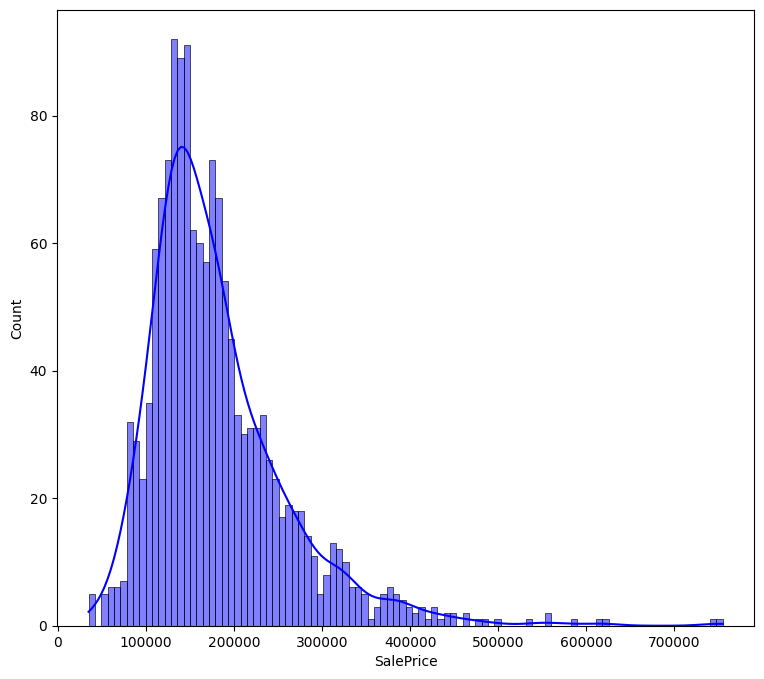

In [61]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
print(df_num['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(df['SalePrice'], color='b', bins=100, kde=True)

## Distribution of variables related to value

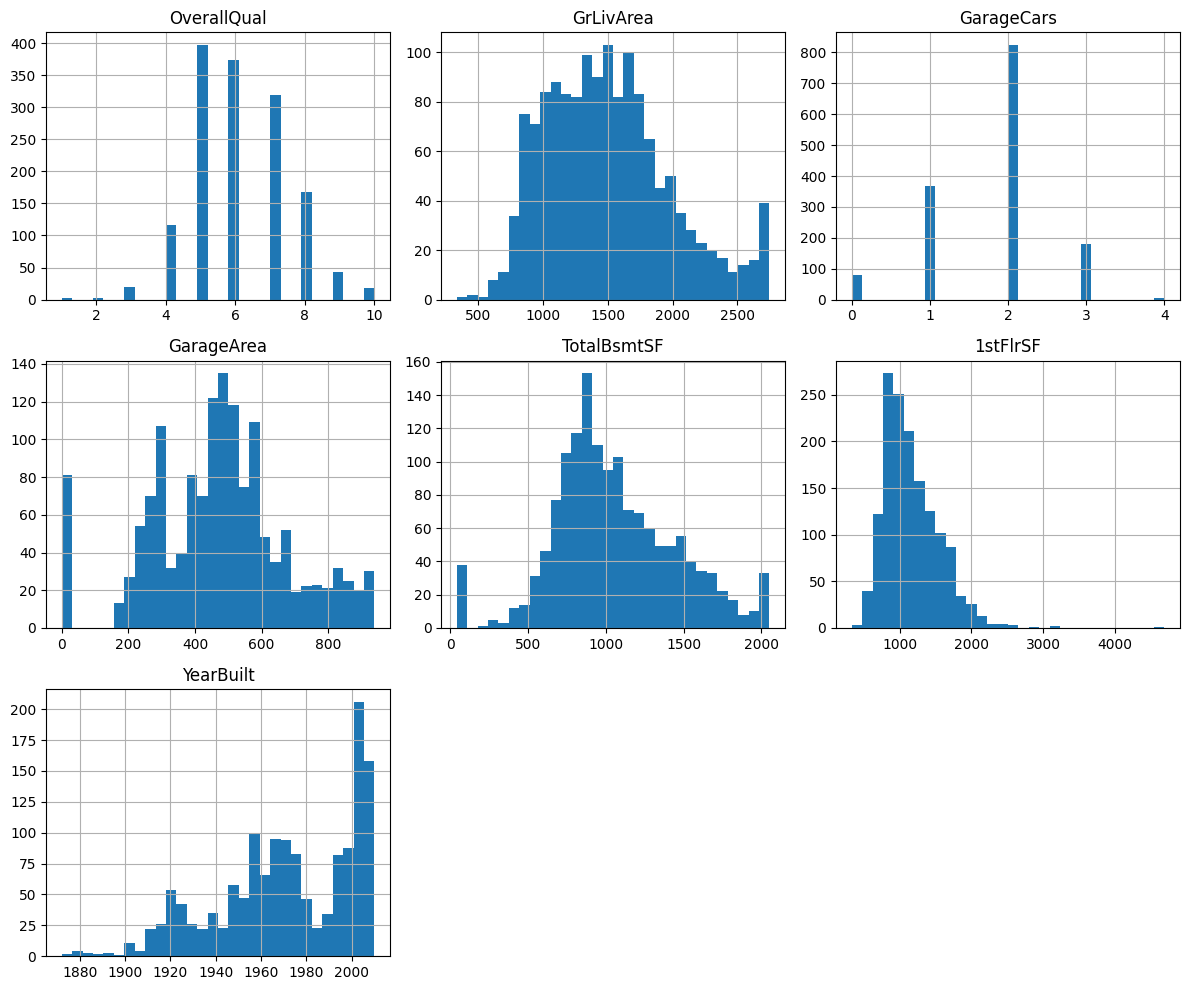

In [62]:
cols_to_plot = ['OverallQual', 'GrLivArea', 'GarageCars', 
                'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']

df_num[cols_to_plot].hist(figsize=(12, 10), bins=30, xlabelsize=10, ylabelsize=10)
plt.tight_layout()
plt.show()

## Plotting the distribution of LotArea and GrLivArea

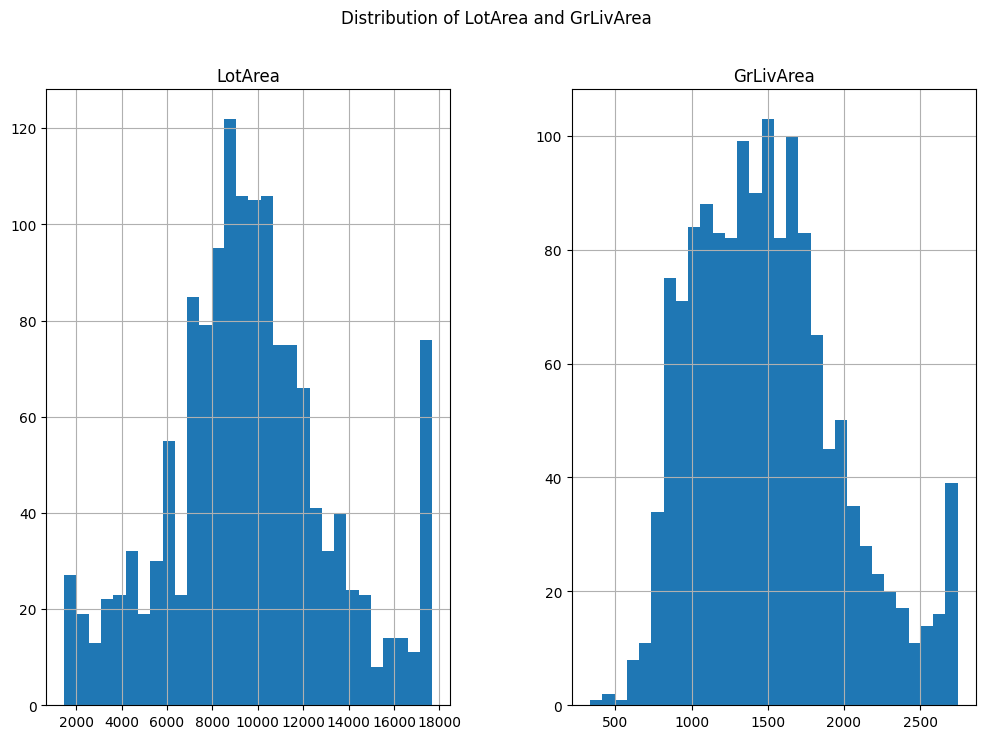

In [63]:
# Plotting the distribution of LotArea and GrLivArea
df[['LotArea', 'GrLivArea']].hist(bins=30, figsize=(12, 8))
plt.suptitle('Distribution of LotArea and GrLivArea')
plt.show()

## Distribution of TotRmsAbvGrd

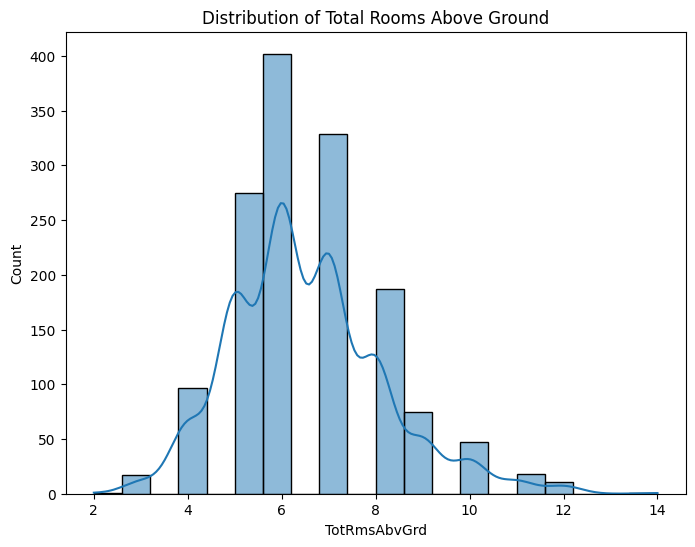

In [64]:
# Plotting the distribution of TotRmsAbvGrd
plt.figure(figsize=(8, 6))
sns.histplot(df['TotRmsAbvGrd'], bins=20, kde=True)
plt.title('Distribution of Total Rooms Above Ground')
plt.show()

## 3. Phân tích 2 biến (Bivariate Analysis)

## GrLivArea vs SalePrice

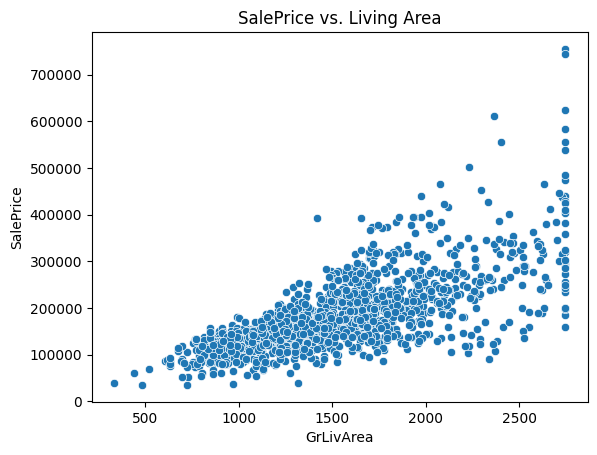

In [65]:
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')
plt.title('SalePrice vs. Living Area')
plt.show()


## SalePrice vs Year Build

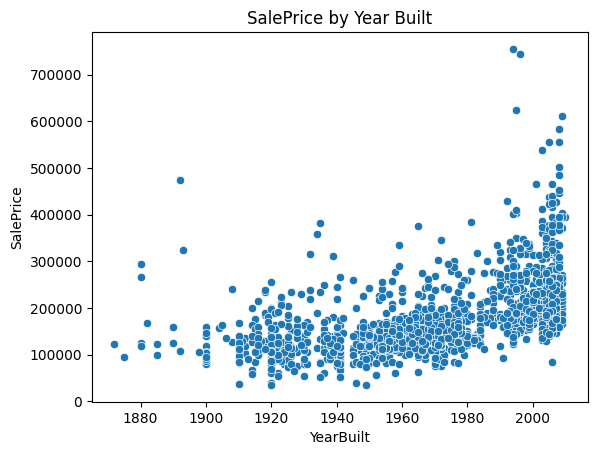

In [66]:
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice')
plt.title('SalePrice by Year Built')
plt.show()

## LotArea vs SalePrice

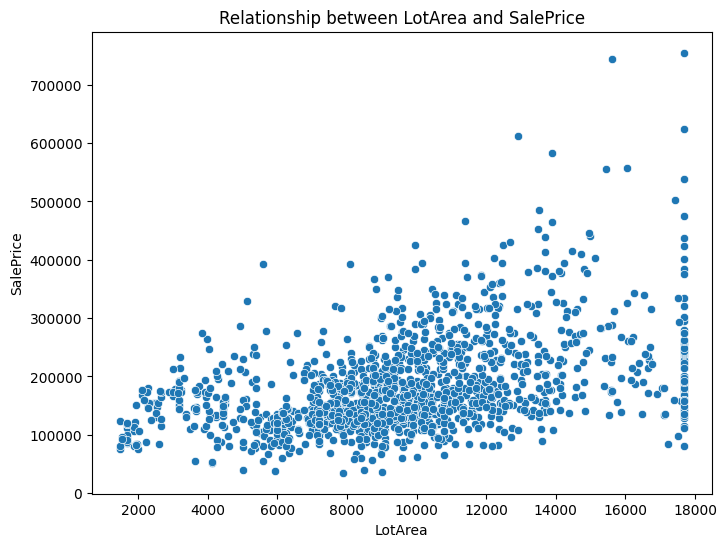

In [67]:
# Scatter plot between LotArea and SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.title('Relationship between LotArea and SalePrice')
plt.show()

## OverallQual vs SalePrice

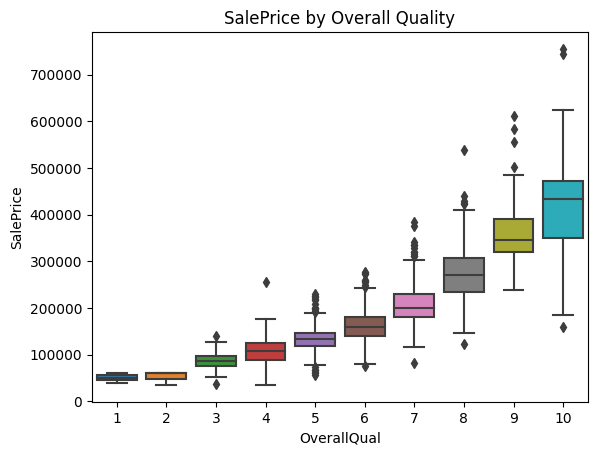

In [68]:
sns.boxplot(data=df, x='OverallQual', y='SalePrice')
plt.title('SalePrice by Overall Quality')
plt.show()

## TotRmsAbvGrd vs SalePrice

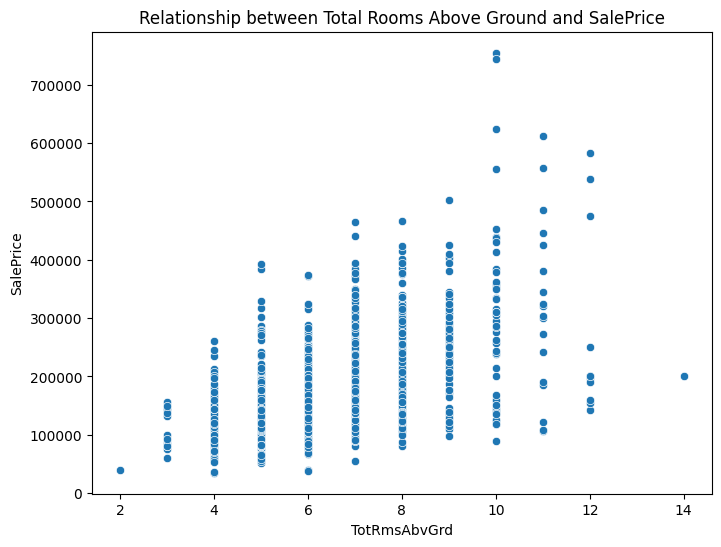

In [69]:
# Scatter plot between TotRmsAbvGrd and SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotRmsAbvGrd', y='SalePrice', data=df)
plt.title('Relationship between Total Rooms Above Ground and SalePrice')
plt.show()

## 4. Multivariate Analysis

## Pair Plot for multiple features

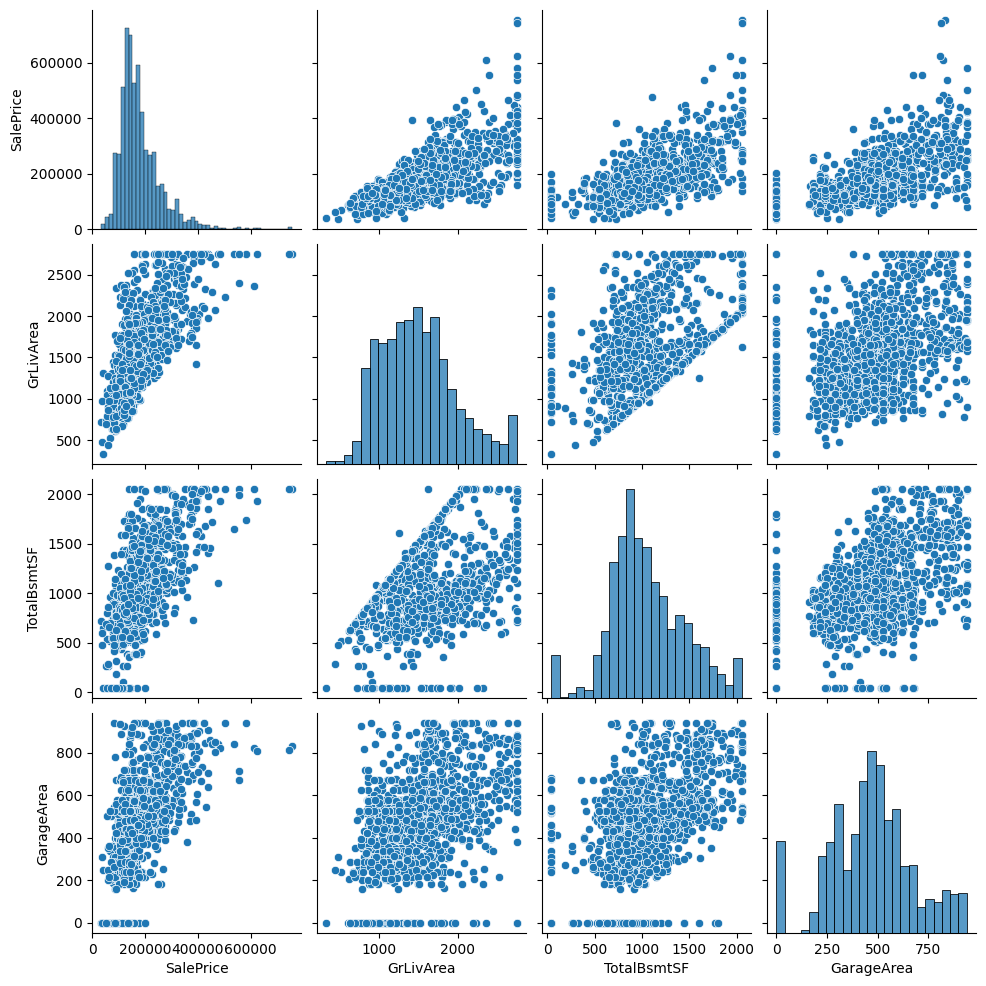

In [70]:
# Pair Plot for multiple features
sns.pairplot(df[['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']])
plt.show()

## Correlation Matrix

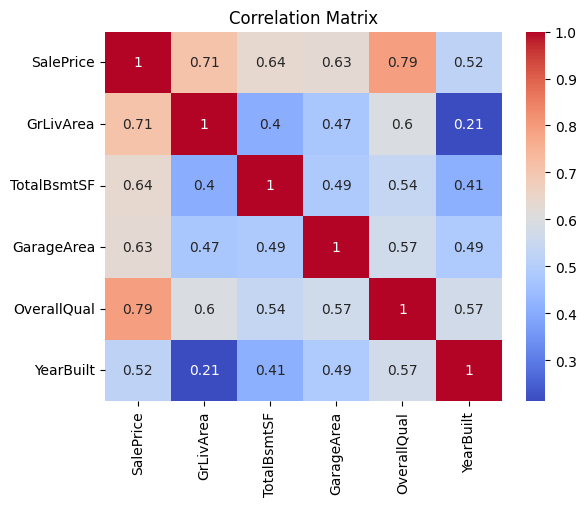

In [71]:
corr = df[['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'OverallQual', 'YearBuilt']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 5. Location Analysis

## Distribution of number of houses by neighborhood

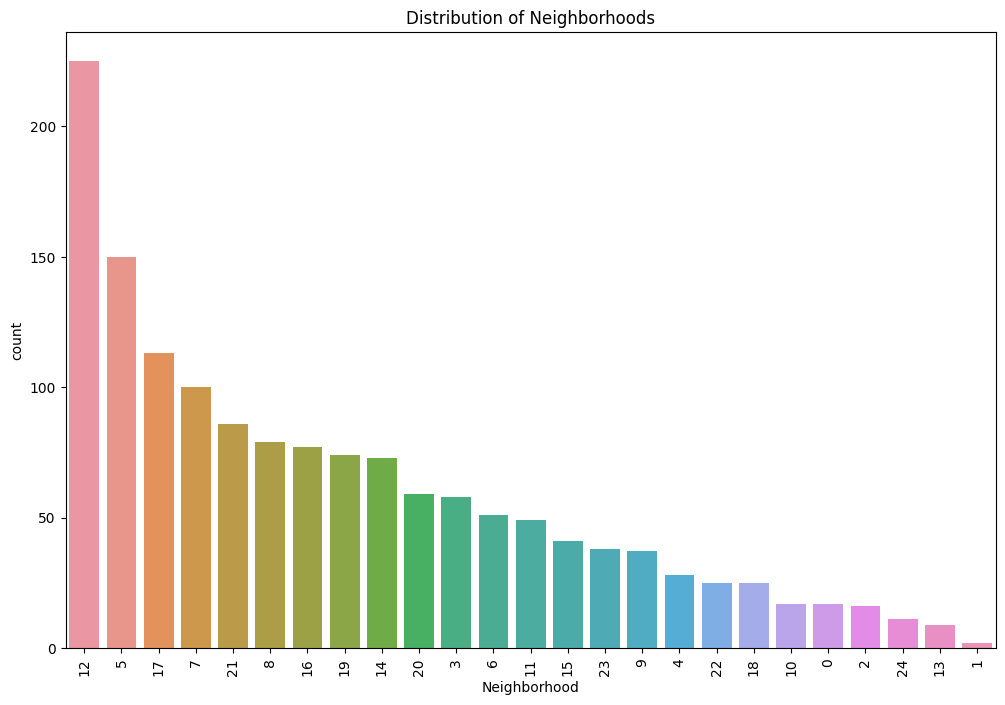

In [72]:
# Checking the distribution of Neighborhood
plt.figure(figsize=(12, 8))
sns.countplot(x='Neighborhood', data=df, order=df['Neighborhood'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Neighborhoods')
plt.show()

## The relationship between neighborhood and price

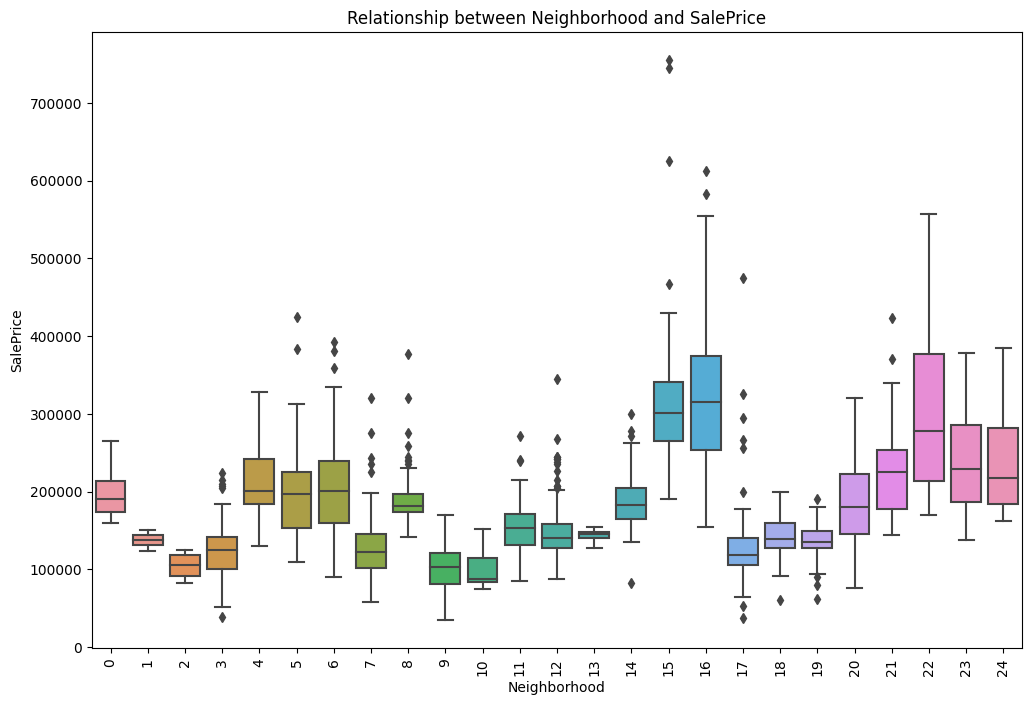

In [73]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=90)
plt.title('Relationship between Neighborhood and SalePrice')
plt.show()

## 6. Quality & Condition Analysis

## OverallQual and SalePrice

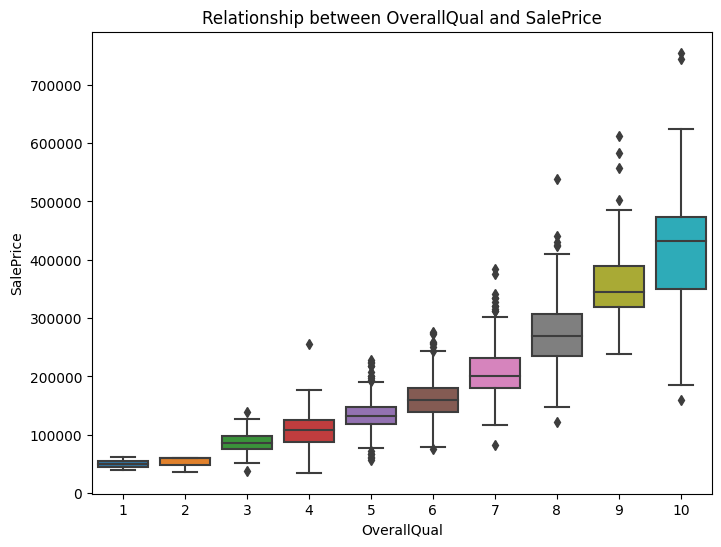

In [74]:
# Boxplot between OverallQual and SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Relationship between OverallQual and SalePrice')
plt.show()

## OverallCond vs SalePrice

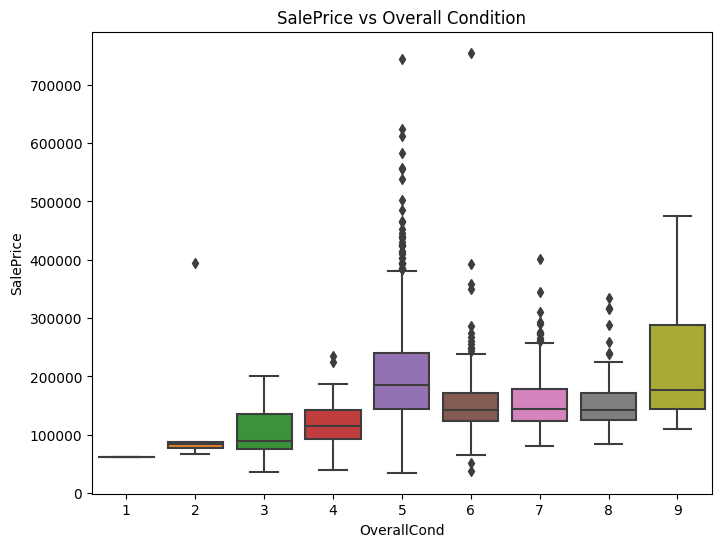

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallCond', y='SalePrice', data=df)
plt.title('SalePrice vs Overall Condition')
plt.show()
